## SIR model on a configuration network in R using simecol

*Author*: Simon Frost

*Date*: 2018-07-12

### Description

### Equations

$$
$$

### References

### Implementation

In [5]:
library(simecol)
library(reshape2)

In [3]:
sir.cn.ode <- new("odeModel",
  main = function(time, init, parms, ...){
    with(as.list(c(init,parms)),{
      dtheta <- -beta*theta+beta*(dpsi(theta,k)/dpsi(1,k))+gamma*(1-theta)
      S <- psi(theta,k)
      I <- 1-S-R
      dR <- gamma*I
      list(c(dtheta,dR))
    })},
  equations = list(),
  parms = c(beta=0.1,gamma=0.05,k=5),
  times = c(from=0,to=125,by=0.01),
  init = c(theta=0.999,R=0),
  solver = "lsoda"
)
poisgn <- list(
  psi = function(theta,k){theta^k},
  dpsi = function(theta,k){k*theta^(k-1)},
  dpsi2 = function(theta,k){k*(k-1)*theta^(k-2)}
)
equations(sir.cn.ode) <- poisgn
sir.cn.ode <- sim(sir.cn.ode)
sir.cn.out <- out(sir.cn.ode)
sir.cn.out$S <- sir.cn.out$theta^parms(sir.cn.ode)[["k"]]
sir.cn.out$I <- 1-sir.cn.out$S-sir.cn.out$R

In [6]:
sir.cn.out.long <- melt(as.data.frame(sir.cn.out),"time")

## Visualisation

In [8]:
library(ggplot2)

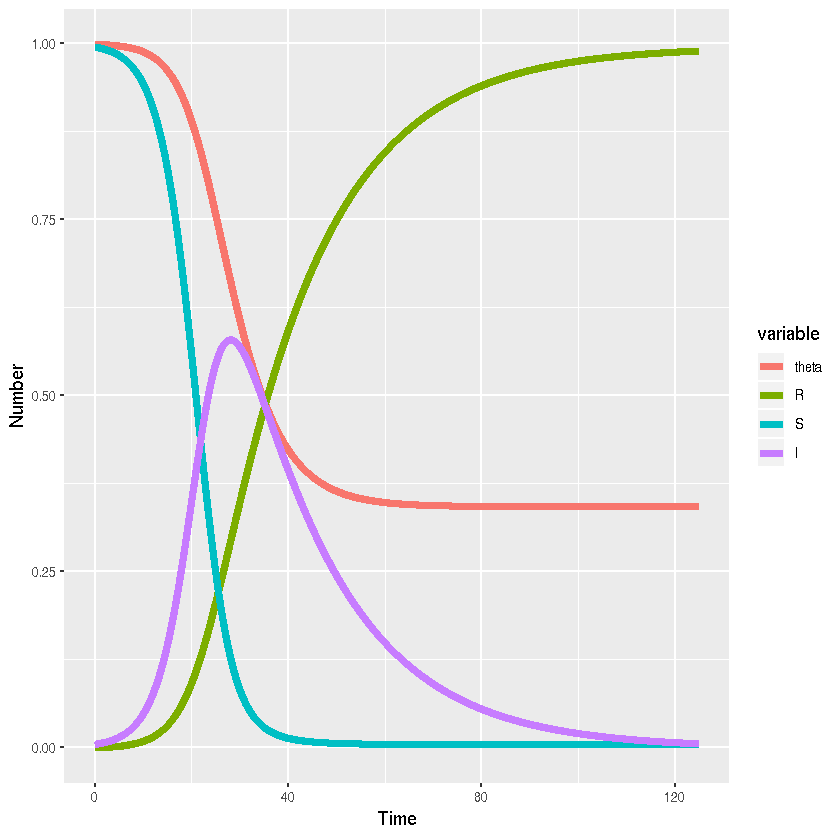

In [10]:
ggplot(sir.cn.out.long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")